In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Qwen 3B, chain-of-thought"

mmlu_entropy_df = pd.read_parquet("../../../data/out/cot_entropy/mmlu_qwen_3b.parquet")

In [2]:
mmlu_entropy_df.head()

,src,answer,options,category,question,cot_content,question_id,answer_index,total_tokens,meta_cluster,base_cluster,qwen2_ans_correct,qwen2_entropies,qwen2_every_token_info,qwen2_ans_token_index,qwen2_response,qwen2_input_embeddings,qwen2_think_embeddings,qwen2_answer_embeddings
0,ori_mmlu-jurisprudence,C,['There is no distinction between the two form...,law,Which of the following criticisms of Llewellyn...,NaN,1286,2,81,Legal Interpretation,Legal Theory Interpretations,True,"[0.5356510877609253, 1.2296925783157349, 0.256...","[[{""token_idx"": 1249, ""token_prob"": 0.77682381...",325,"To address this question, let's analyze each o...","{""min"": [-7.0, -7.03125, -7.5, -5.75, -8.3125,...","{""min"": [-5.65625, -3.9375, -5.4375, -5.03125,...","{""min"": [2.25, -1.609375, -0.1298828125, -0.30..."
1,ori_mmlu-international_law,E,"['Article 19', 'Article 11', 'Article 12', 'Ar...",law,Which of the following articles are not qualif...,NaN,1293,4,38,Legal Interpretation,Constitutional Law,False,"[0.06751268357038498, 0.12100628763437271, 0.0...","[[{""token_idx"": 641, ""token_prob"": 5.760890053...",420,To determine which of these articles are not q...,"{""min"": [-7.3125, -7.4375, -8.1875, -4.8125, -...","{""min"": [-5.84375, -3.765625, -5.75, -4.875, -...","{""min"": [2.1875, -1.6875, 0.1533203125, -0.261..."
2,ori_mmlu-management,D,"['Work delegation', 'Workload balancing', 'Wor...",business,As what is ensuring that one individual does n...,NaN,83,3,49,Economics & Finance MCQs,Business & Marketing Queries,False,"[0.5539455413818359, 1.391388177871704, 0.0642...","[[{""token_idx"": 785, ""token_prob"": 0.000854881...",275,To determine the correct term for ensuring tha...,"{""min"": [-6.65625, -8.0, -7.5, -6.1875, -8.75,...","{""min"": [-3.609375, -5.53125, -4.15625, -5.843...","{""min"": [2.015625, -1.34375, -0.46484375, 0.06..."
3,stemez-Business,J,"['$308.25', '$142.75', '$199.99', '$225.85', '...",business,Margaret Denault recently rented a truck to dr...,NaN,94,9,118,Economics & Finance MCQs,Business Finance Questions,False,"[0.2805074155330658, 1.1323387622833252, 0.270...","[[{""token_idx"": 1249, ""token_prob"": 0.92263787...",335,"To solve this problem, we need to calculate th...","{""min"": [-6.875, -6.875, -7.53125, -5.4375, -8...","{""min"": [-5.40625, -6.0, -6.0, -6.71875, -6.12...","{""min"": [2.25, -1.609375, -0.1298828125, -0.30..."
4,stemez-Business,I,"['$60,000', '$43,200', '$1,794', '$25,000', '$...",business,The tax rate in the town of Centerville is 11(...,NaN,104,8,102,Economics & Finance MCQs,Business Finance Questions,True,"[0.1345130205154419, 0.7144346237182617, 0.227...","[[{""token_idx"": 1249, ""token_prob"": 0.97047263...",443,"To solve this problem, we need to understand h...","{""min"": [-6.875, -6.875, -7.53125, -6.34375, -...","{""min"": [-5.375, -6.15625, -5.40625, -4.625, -...","{""min"": [2.109375, -0.984375, -0.06494140625, ..."


In [3]:
mmlu_entropy_df.value_counts("qwen2_ans_token_index", dropna=False)

qwen2_ans_token_index
-1      969
 393     50
 448     50
 404     47
 402     46
       ... 
 834      1
 984      1
 160      1
 159      1
 182      1
Name: count, Length: 872, dtype: int64

In [4]:
# Filter out unanswered questions (qwen2_ans_token_index == -1)

mmlu_entropy_df_filtered = mmlu_entropy_df[mmlu_entropy_df["qwen2_ans_token_index"] != -1]

print(f"Len = {len(mmlu_entropy_df)} before filtering and {len(mmlu_entropy_df_filtered)} after filtering")

Len = 12032 before filtering and 11063 after filtering


In [5]:
from transformers import AutoTokenizer

from reasoning_fine_tune.utils.processing import extract_cot_answer_entropy_from_row, extract_cot_answer_from_row

MODEL_NAME = "Qwen/Qwen2.5-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

mmlu_entropy_df_filtered["qwen2_answer"] = mmlu_entropy_df_filtered.apply(
    lambda row: extract_cot_answer_from_row(tokenizer, row, "qwen2_every_token_info", "qwen2_ans_token_index"), axis=1
)
mmlu_entropy_df_filtered["qwen2_answer_entropy"] = mmlu_entropy_df_filtered.apply(
    lambda row: extract_cot_answer_entropy_from_row(row, "qwen2_entropies", "qwen2_ans_token_index"), axis=1
)

/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_51971/1244524361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_entropy_df_filtered["qwen2_answer"] = mmlu_entropy_df_filtered.apply(
/var/folders/62/r46p4vgs7m5bbync7hl0ykjc0000gp/T/ipykernel_51971/1244524361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmlu_entropy_df_filtered["qwen2_answer_entropy"] = mmlu_entropy_df_filtered.apply(


In [6]:
# Filter out incorrectly formatted answers (answer token is not one of the options)
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

print(mmlu_entropy_df_filtered.value_counts("qwen2_answer", dropna=False))

mmlu_entropy_df_filtered = keep_only_valid_and_known_answers(mmlu_entropy_df_filtered, "qwen2_answer")

print(mmlu_entropy_df_filtered.value_counts("qwen2_answer", dropna=False))

qwen2_answer
1         1960
3         1678
4         1368
2         1253
7         1113
5          965
9          965
8          936
6          811
0            4
number       4
none         3
F            1
answer       1
f            1
Name: count, dtype: int64
qwen2_answer
1    1960
3    1678
4    1368
2    1253
7    1113
5     965
9     965
8     936
6     811
Name: count, dtype: int64


In [7]:
print(mmlu_entropy_df_filtered.value_counts("qwen2_answer_entropy", dropna=False))

qwen2_answer_entropy
0.000047    2
0.000055    2
0.011643    2
0.011881    2
0.397396    2
           ..
0.000889    1
0.000893    1
0.000894    1
0.000894    1
2.462173    1
Name: count, Length: 10897, dtype: int64


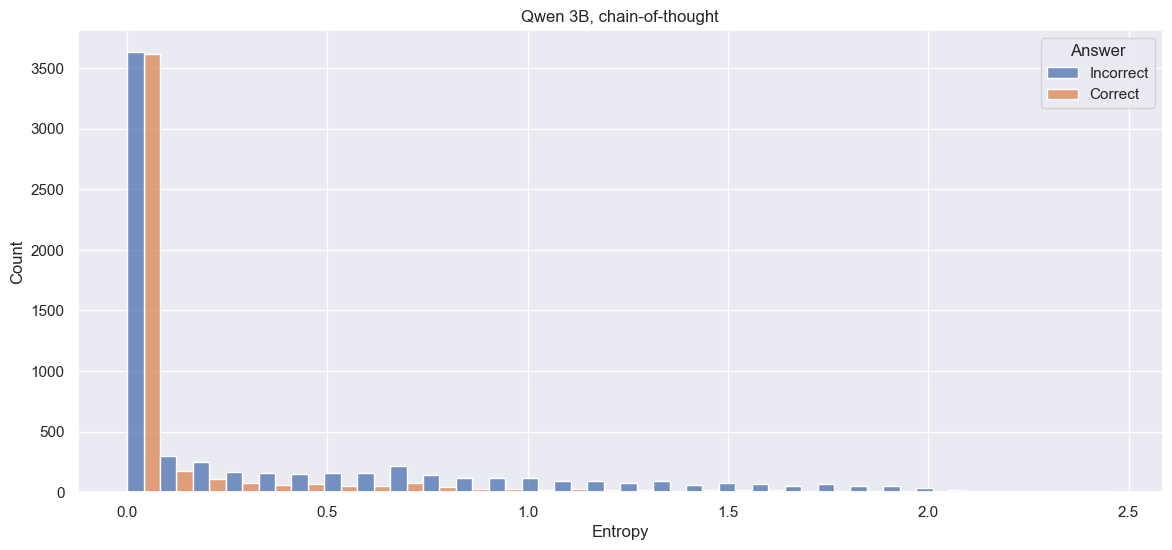

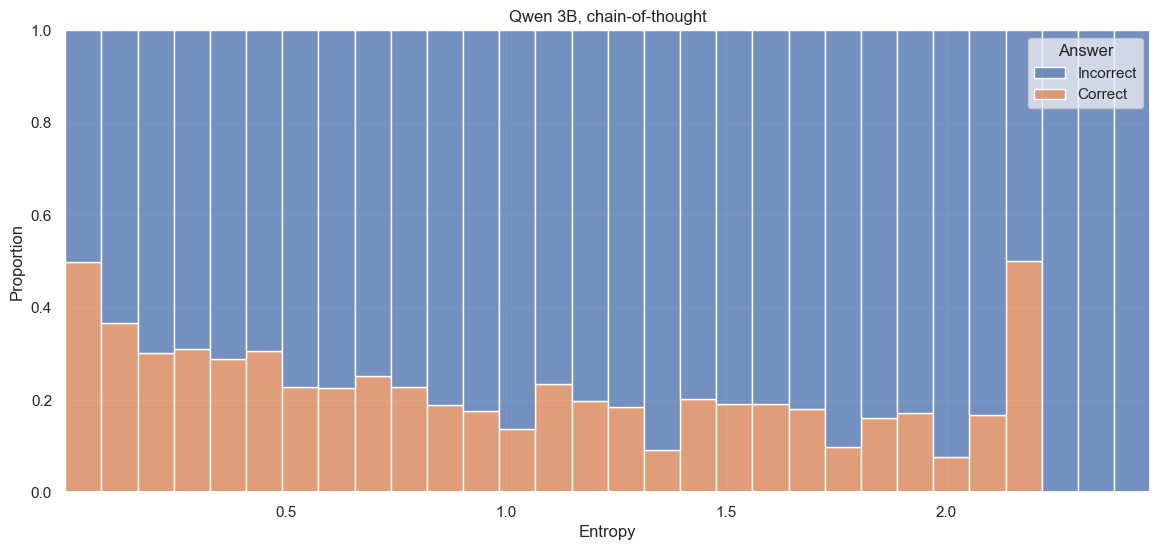

In [8]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df_filtered, "qwen2_answer_entropy", "qwen2_ans_correct", model_name=model_title)

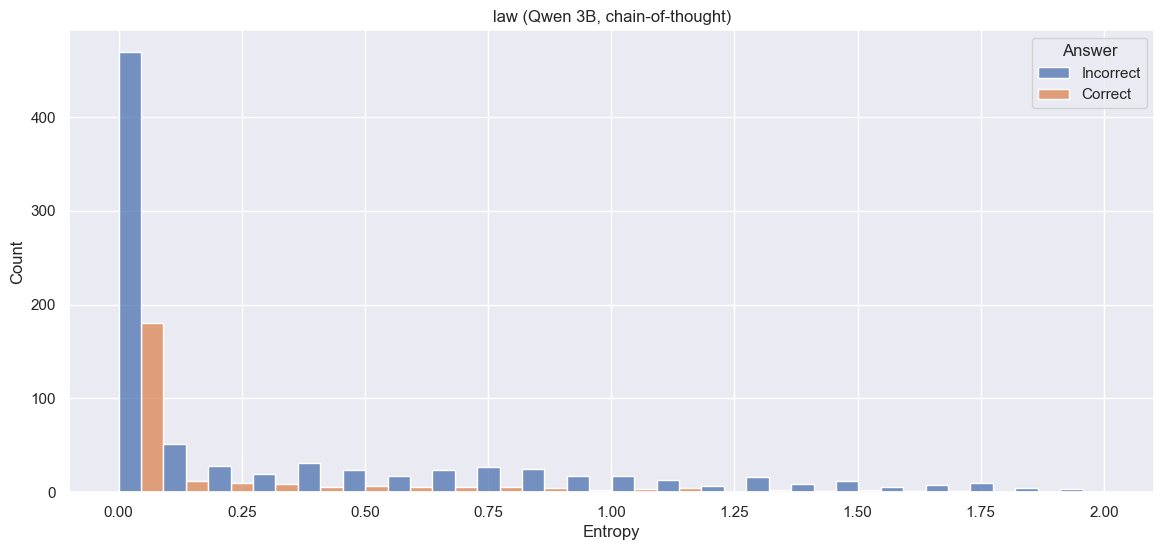

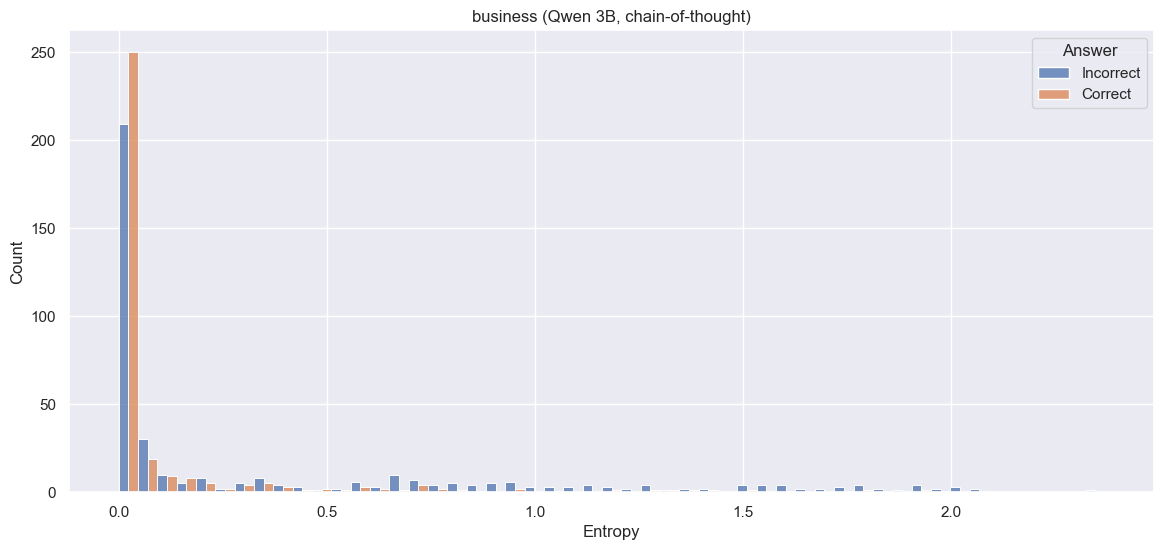

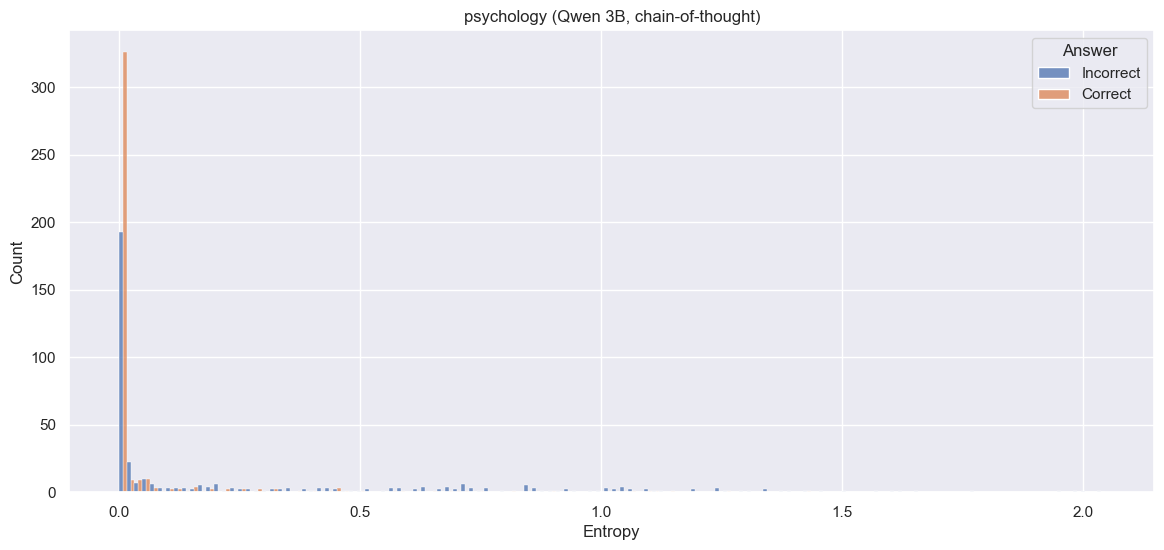

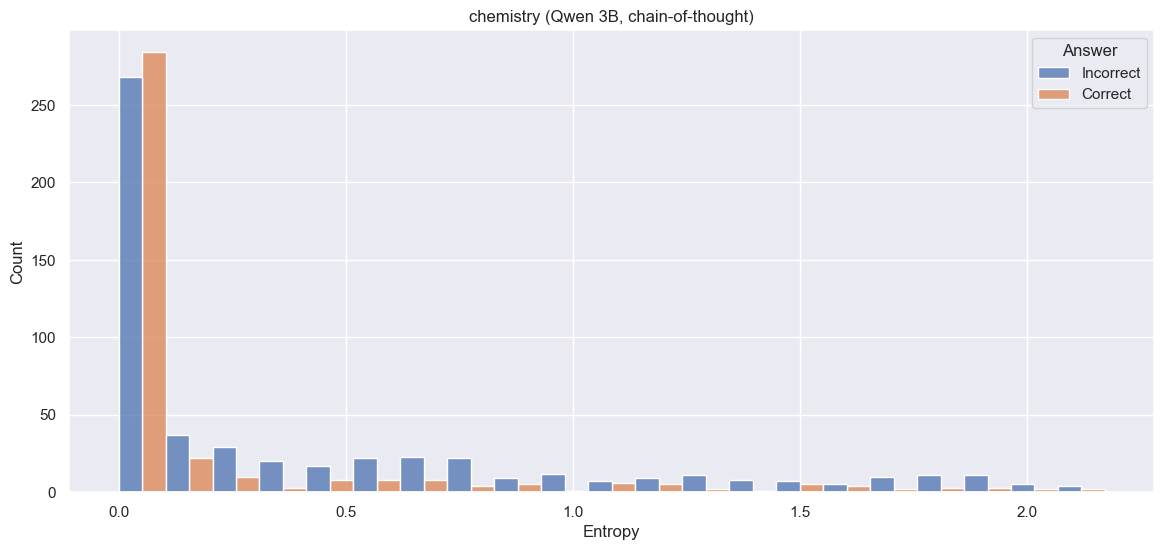

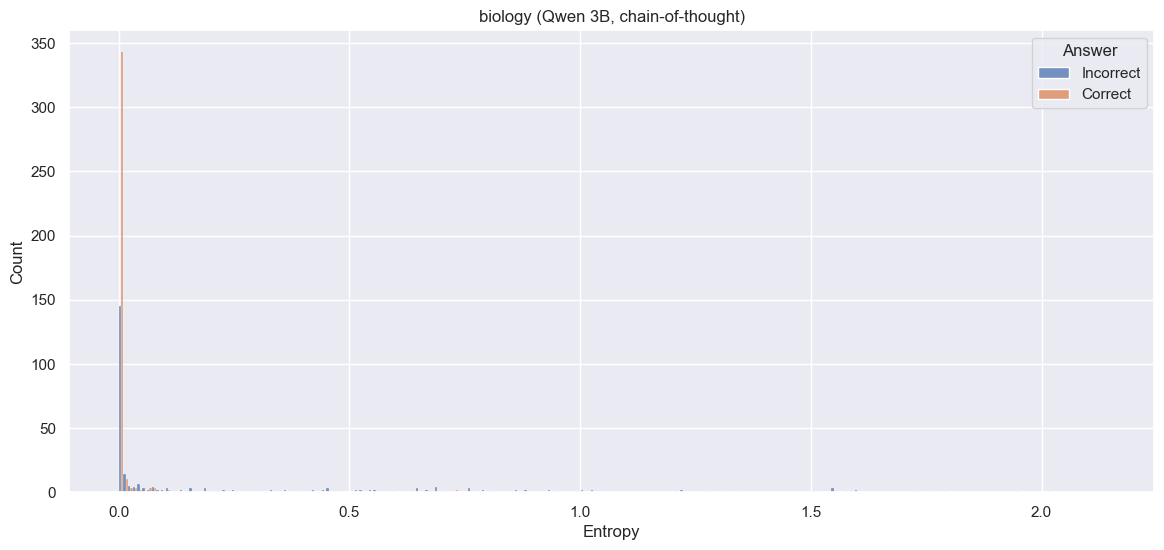

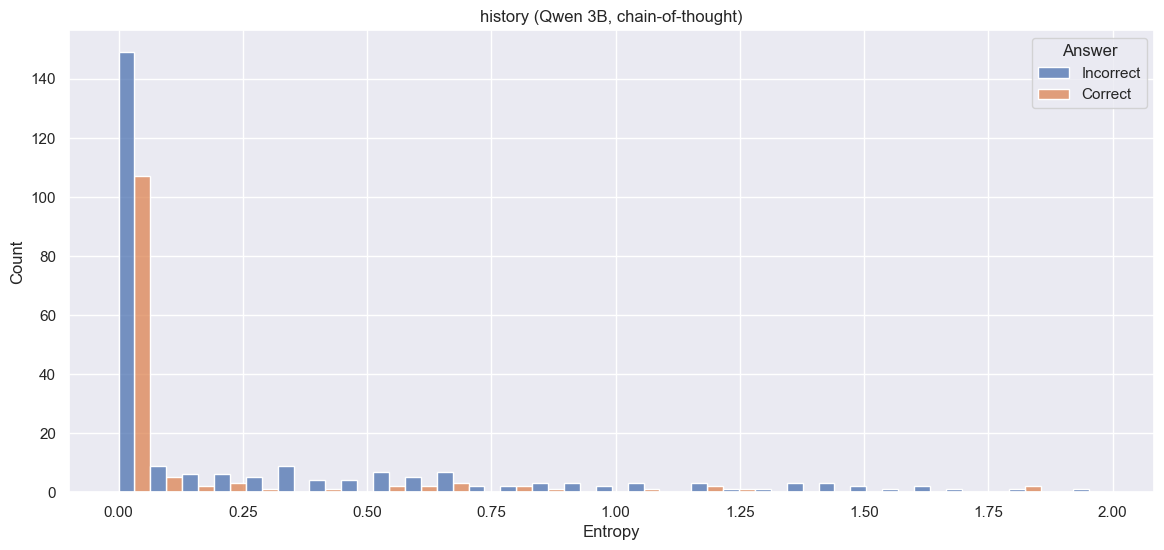

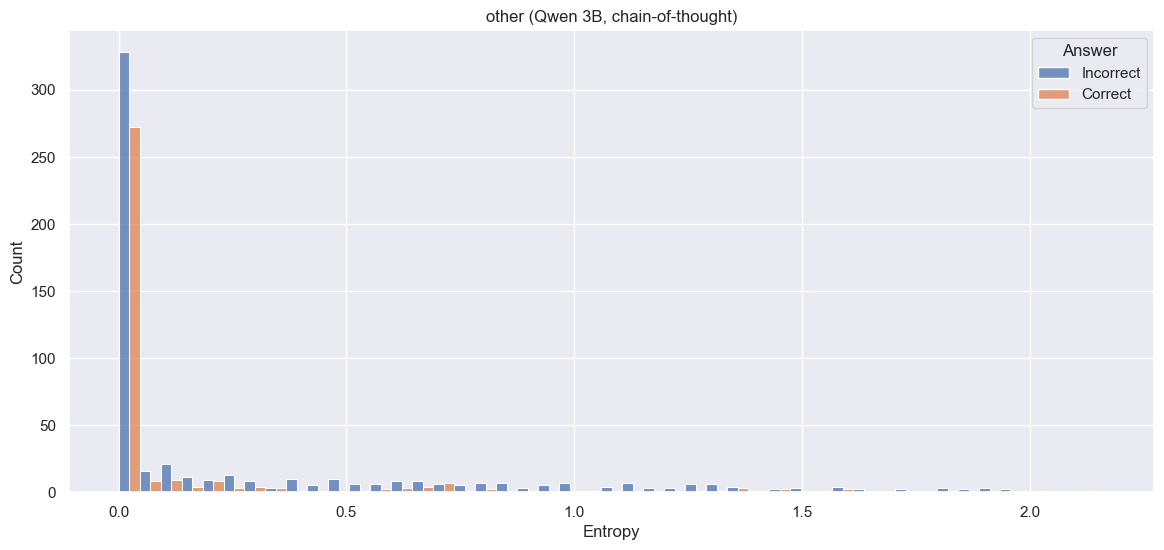

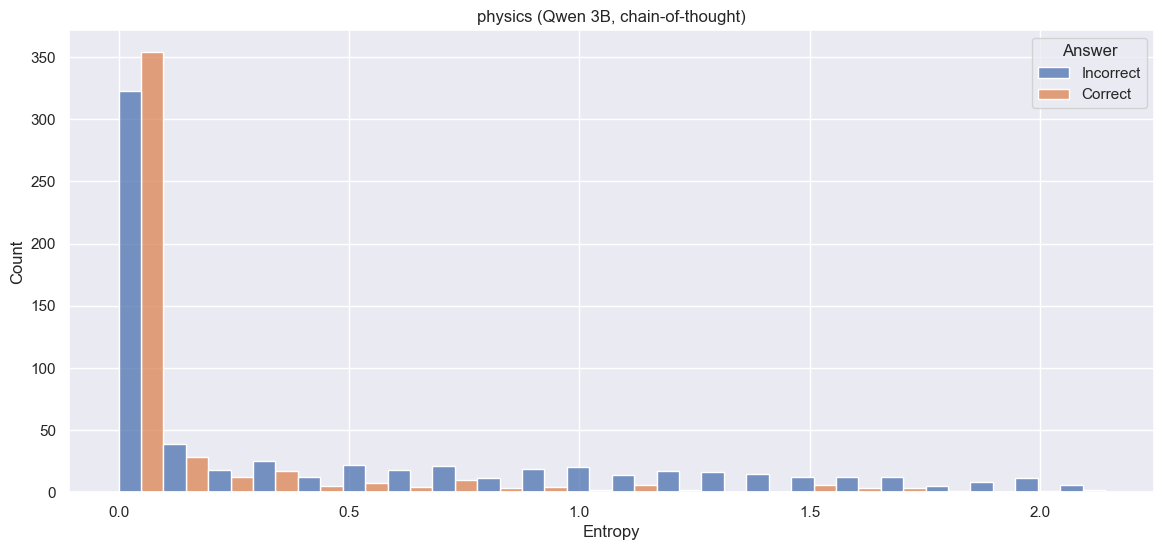

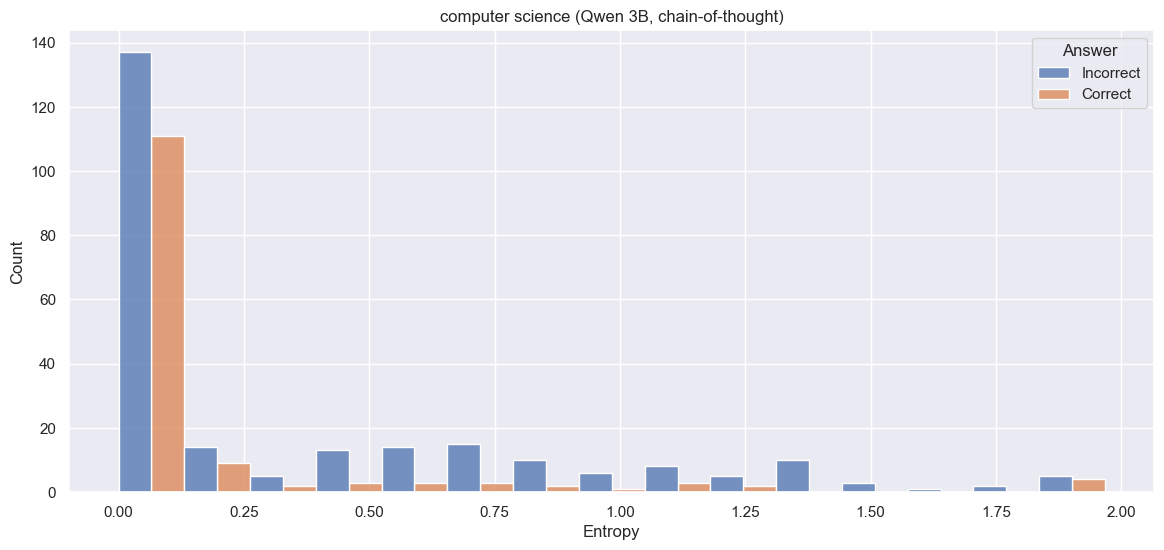

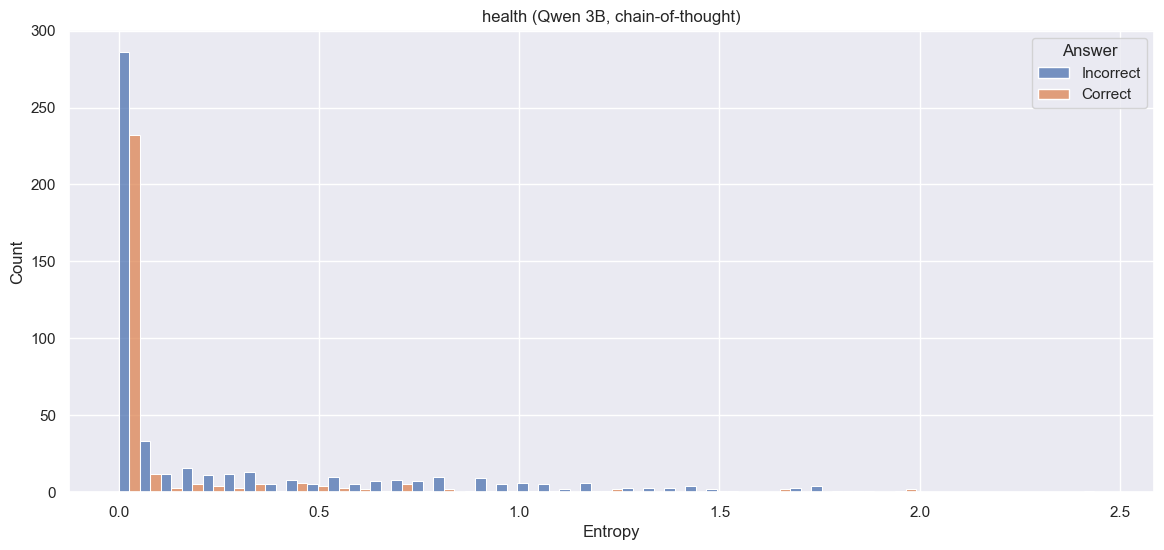

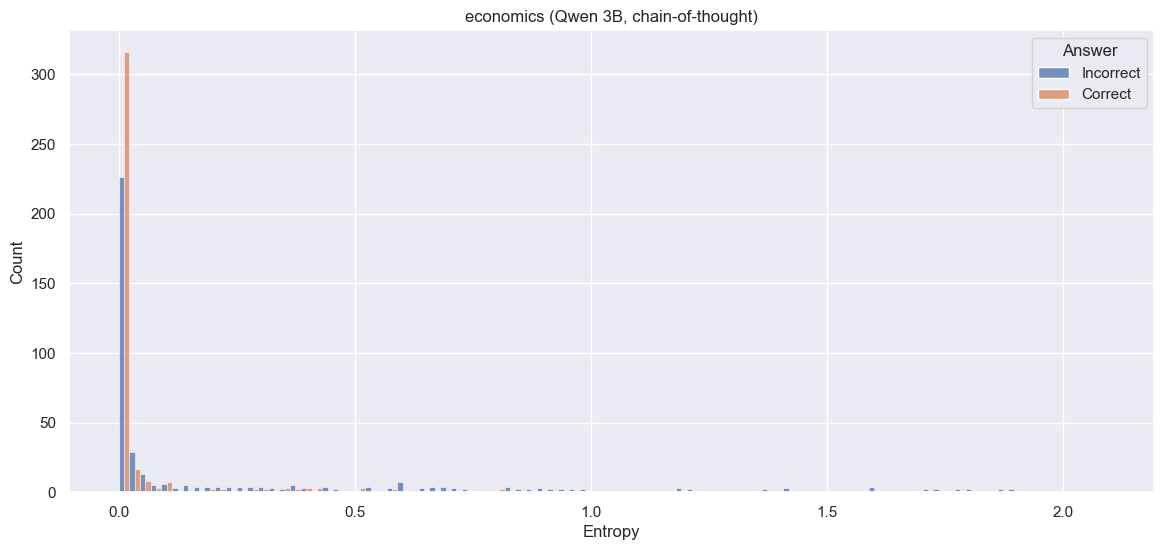

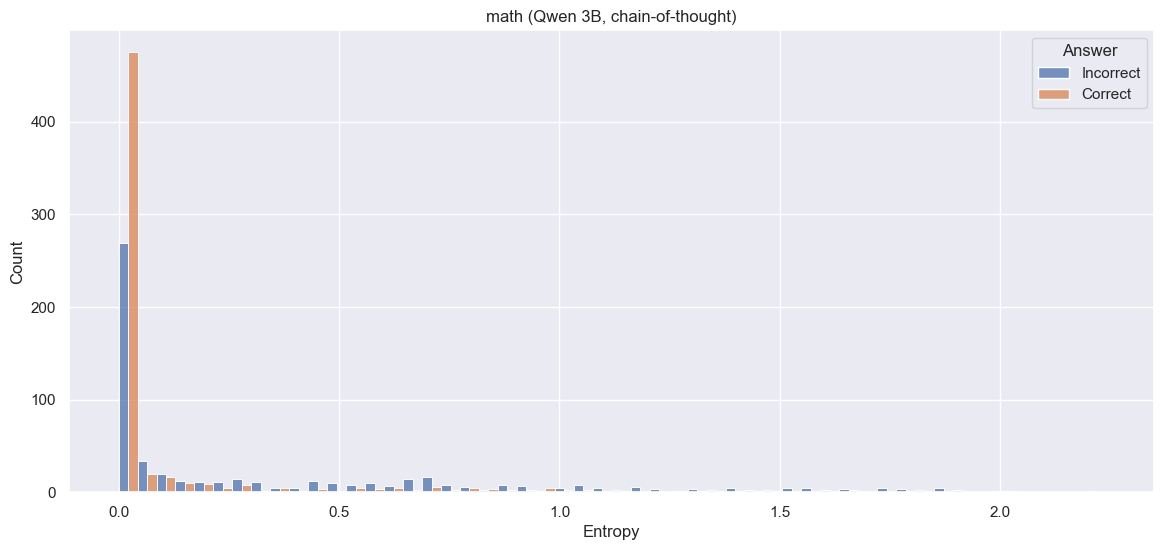

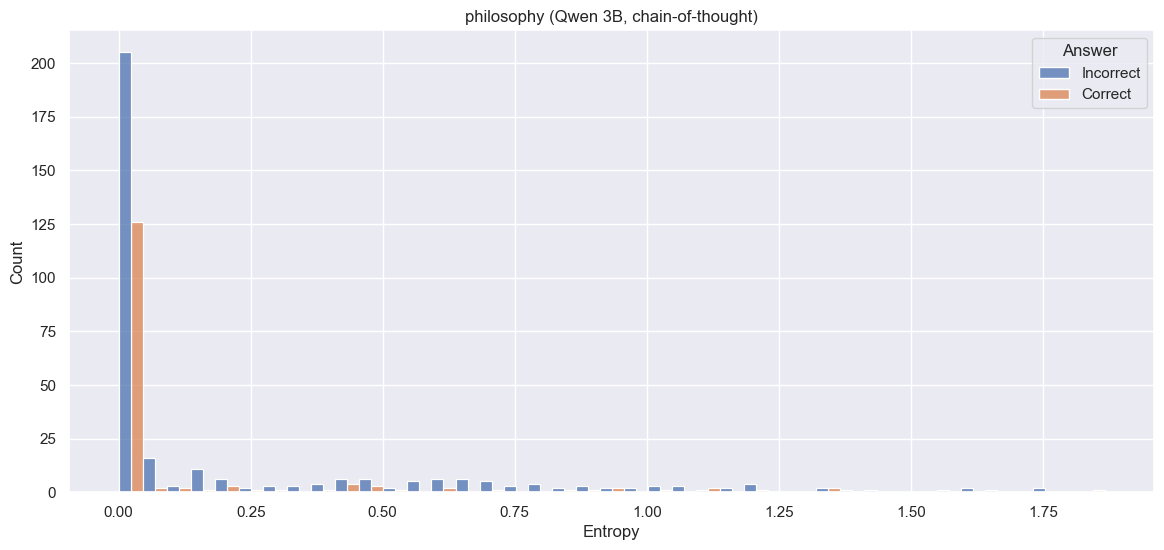

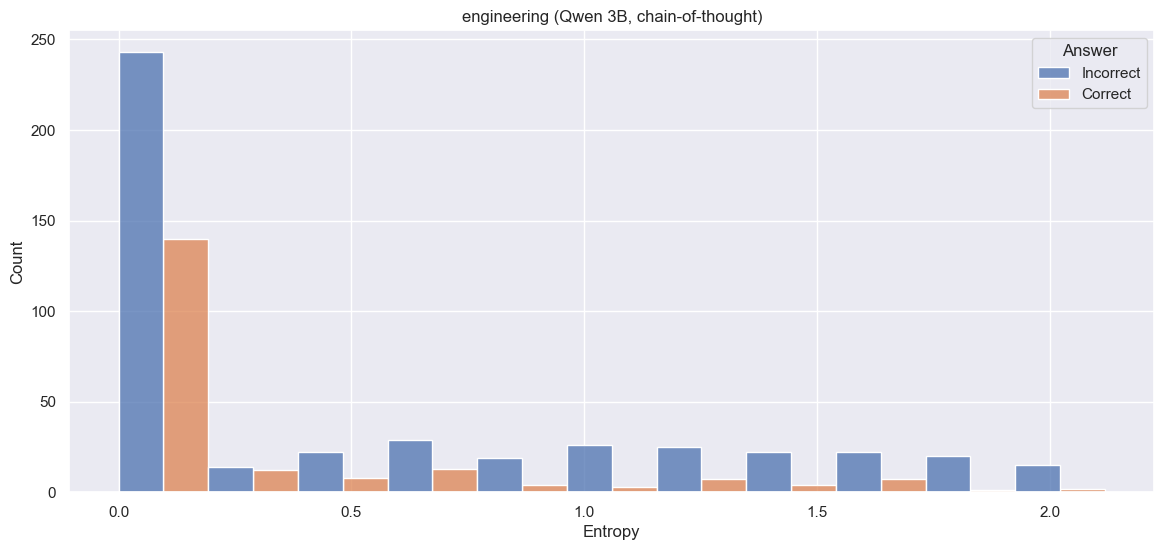

In [9]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_filtered,
    "category",
    "qwen2_answer_entropy",
    "qwen2_ans_correct",
    model_name=model_title,
)

In [10]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_filtered,
    category_col="category",
    model_answer_correct_col="qwen2_ans_correct",
    score_col="qwen2_answer_entropy",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.680956,0.361912,11049,0.411802,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
1,law,0.600016,0.200033,1099,0.238399,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
2,business,0.680843,0.361686,734,0.452316,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
3,psychology,0.726400,0.452800,792,0.507576,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
4,chemistry,0.645461,0.290921,935,0.414973,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
5,biology,0.773324,0.546648,707,0.561528,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
6,history,0.622706,0.245412,380,0.355263,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
7,other,0.631662,0.263325,912,0.383772,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
8,physics,0.683838,0.367676,1126,0.417407,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
9,computer science,0.679450,0.358899,391,0.365729,"Qwen 3B, chain-of-thought",qwen2_answer_entropy


In [11]:
from reasoning_fine_tune.analysis.join_with_masj_education_levels import join_with_masj_education_levels

mmlu_entropy_df_with_masj = join_with_masj_education_levels(mmlu_entropy_df_filtered)

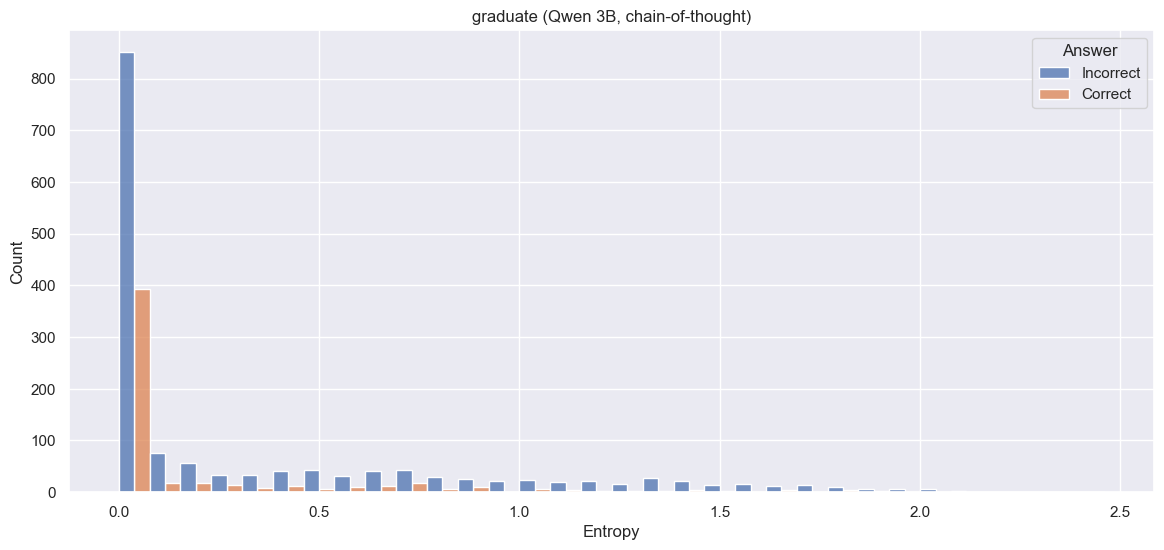

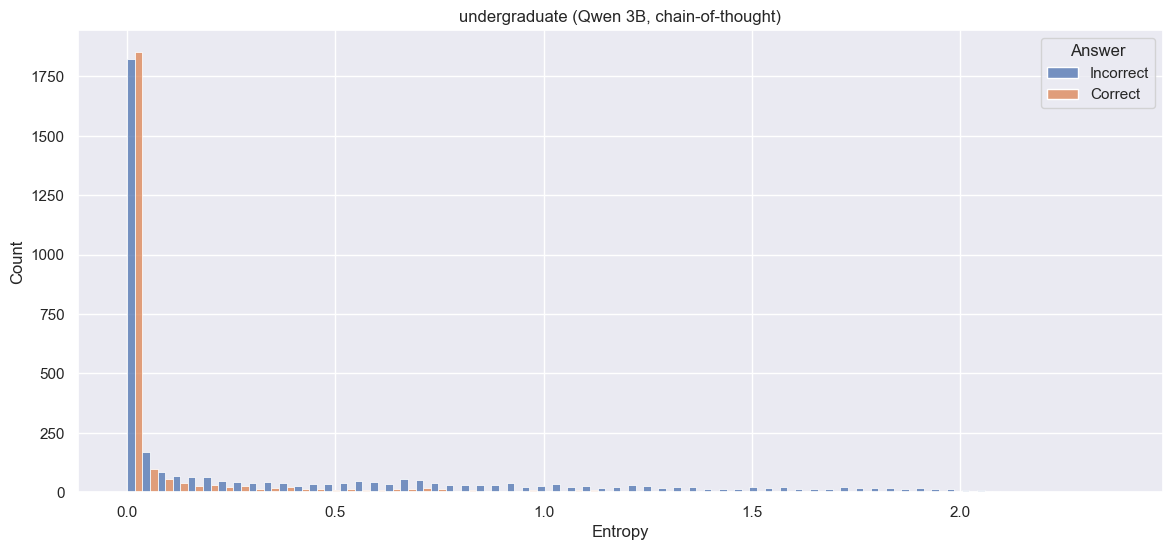

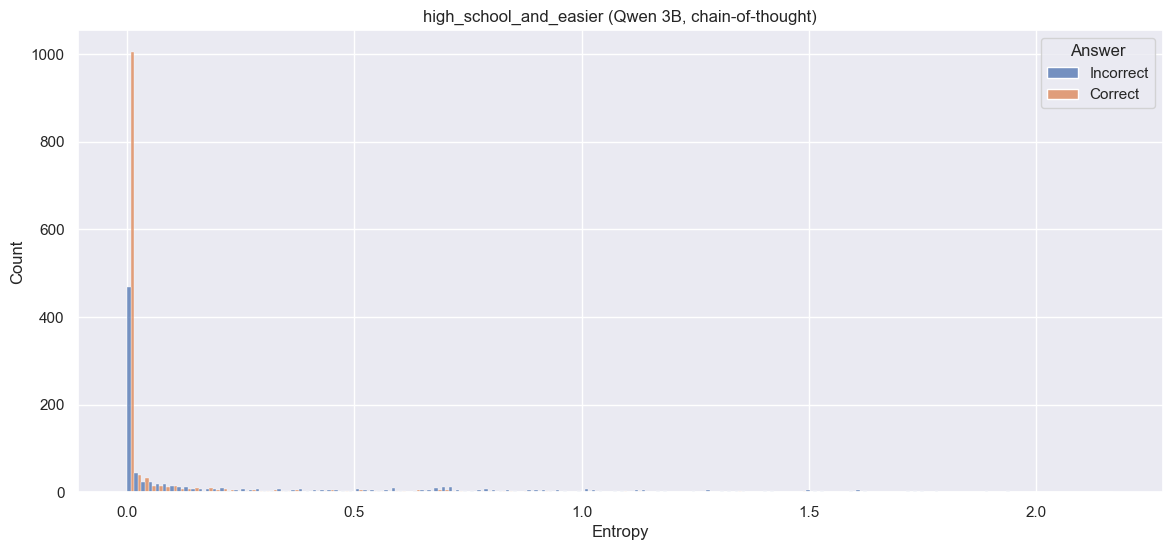

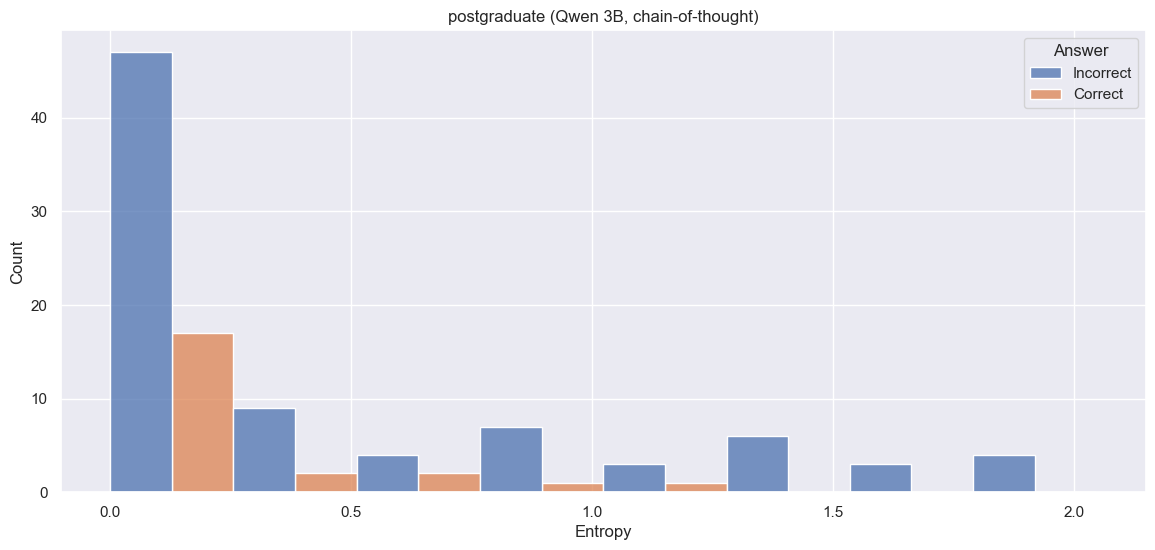

In [12]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_with_masj,
    "masj_complexity",
    "qwen2_answer_entropy",
    "qwen2_ans_correct",
    model_name=model_title,
)

In [13]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_with_masj,
    category_col="masj_complexity",
    model_answer_correct_col="qwen2_ans_correct",
    score_col="qwen2_answer_entropy",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.682454,0.364908,10615,0.411493,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
1,graduate,0.614006,0.228012,2102,0.267840,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
2,undergraduate,0.671712,0.343425,6101,0.407310,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
3,high_school_and_easier,0.717481,0.434962,2306,0.562446,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
4,postgraduate,0.633316,0.266632,106,0.216981,"Qwen 3B, chain-of-thought",qwen2_answer_entropy
